<h1>Microproyecto #3</h1>
<h2>Equipo 2</h2>
<p>
Estudiantes: <br>
Carlos Jose Quijano Valencia <br>
Jose Fernando López Ramírez <br>
Juan David Cortés Amador
</p>

In [480]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from matplotlib import pyplot as plt
%matplotlib inline

<h2>1) Descripción de los datos y preprocesamiento</h2> <br>
El conjunto de datos contiene información sobre diferentes características de las mujeres y sus parejas, con el objetivo de predecir el método anticonceptivo utilizado. Las características incluyen factores como edad, número de hijos, nivel educativo y exposición a medios. <br>

Preprocesamiento realizado: <br>
-Inversión de valores: Se invirtieron las columnas ¿La esposa ahora está trabajando? y Exposición a los medios anticonceptivos porque estaban codificadas de manera inversa. <br>
-Eliminación de columnas irrelevantes: Se eliminó la columna Ocupación del esposo por ser categórica ordinal y no tener una representación numérica útil.<br>
-Barajado de datos: Se mezclaron aleatoriamente para evitar sesgos. <br>
-Distribución del objetivo: Se graficó la variable Método anticonceptivo utilizado para analizar su distribución.

In [481]:
df = pd.read_csv('anticonceptivo.csv')
df.head()

,Edad de la esposa,Educación de la esposa,Educación del esposo,Número de hijos nacidos,Religión de la esposa,¿La esposa ahora está trabajando?,Ocupación del esposo,Índice de nivel de vida,Exposición a los medios anticonceptivos,Método anticonceptivo utilizado
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [482]:
print(df.isnull().sum())

Edad de la esposa                          0
Educación de la esposa                     0
Educación del esposo                       0
Número de hijos nacidos                    0
Religión de la esposa                      0
¿La esposa ahora está trabajando?          0
Ocupación del esposo                       0
Índice de nivel de vida                    0
Exposición a los medios anticonceptivos    0
Método anticonceptivo utilizado            0
dtype: int64


In [483]:
#la esposa está trabajando esta al revez y exposicion a los medios esta al revez
df_copy = df.copy()
df_copy['¿La esposa ahora está trabajando?'] = df['¿La esposa ahora está trabajando?'].map({1: 0, 0: 1})
df_copy['Exposición a los medios anticonceptivos'] = df['Exposición a los medios anticonceptivos'].map({1: 0, 0: 1})
df_copy.head()

,Edad de la esposa,Educación de la esposa,Educación del esposo,Número de hijos nacidos,Religión de la esposa,¿La esposa ahora está trabajando?,Ocupación del esposo,Índice de nivel de vida,Exposición a los medios anticonceptivos,Método anticonceptivo utilizado
0,24,2,3,3,1,0,2,3,1,1
1,45,1,3,10,1,0,3,4,1,1
2,43,2,3,7,1,0,3,4,1,1
3,42,3,2,9,1,0,3,3,1,1
4,36,3,3,8,1,0,3,2,1,1


In [484]:
#eliminamos la columna categorica ordinal
df_cleaned = df_copy.drop(columns=['Ocupación del esposo'])
df_cleaned.head()

,Edad de la esposa,Educación de la esposa,Educación del esposo,Número de hijos nacidos,Religión de la esposa,¿La esposa ahora está trabajando?,Índice de nivel de vida,Exposición a los medios anticonceptivos,Método anticonceptivo utilizado
0,24,2,3,3,1,0,3,1,1
1,45,1,3,10,1,0,4,1,1
2,43,2,3,7,1,0,4,1,1
3,42,3,2,9,1,0,3,1,1
4,36,3,3,8,1,0,2,1,1


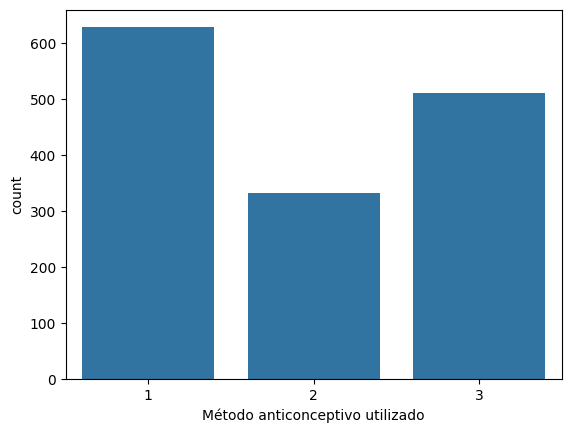

In [485]:
#graficamos el metodo anticonceptivo utilizado
sb.countplot(x='Método anticonceptivo utilizado', data=df_copy)
plt.show()

In [486]:
#Mezclamos los datos con la misma semilla
df_cleaned = df_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

In [487]:
#Separamos los datos
X = df_cleaned.drop(columns=['Método anticonceptivo utilizado'])
y = df_cleaned['Método anticonceptivo utilizado']

<h2>2) Justificación del nodo raíz y métrica adecuada</h2>
Se utilizó SelectKBest para evaluar la importancia de cada variable. El nodo raíz debe ser la característica con mayor poder predictivo. Se probaron gini y entropy.

In [488]:
# SelectKBest
selector = SelectKBest(k='all')
selector.fit(X, y)

# Obtener scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
scores = scores.sort_values('Score', ascending=False)

print("Importancia de características:")
print(scores)

Importancia de características:
                                   Feature      Score
1                   Educación de la esposa  71.853562
0                        Edad de la esposa  33.289739
6                  Índice de nivel de vida  31.509675
2                     Educación del esposo  25.206981
7  Exposición a los medios anticonceptivos  16.099058
3                  Número de hijos nacidos  13.452832
4                    Religión de la esposa  10.949670
5        ¿La esposa ahora está trabajando?   2.597444


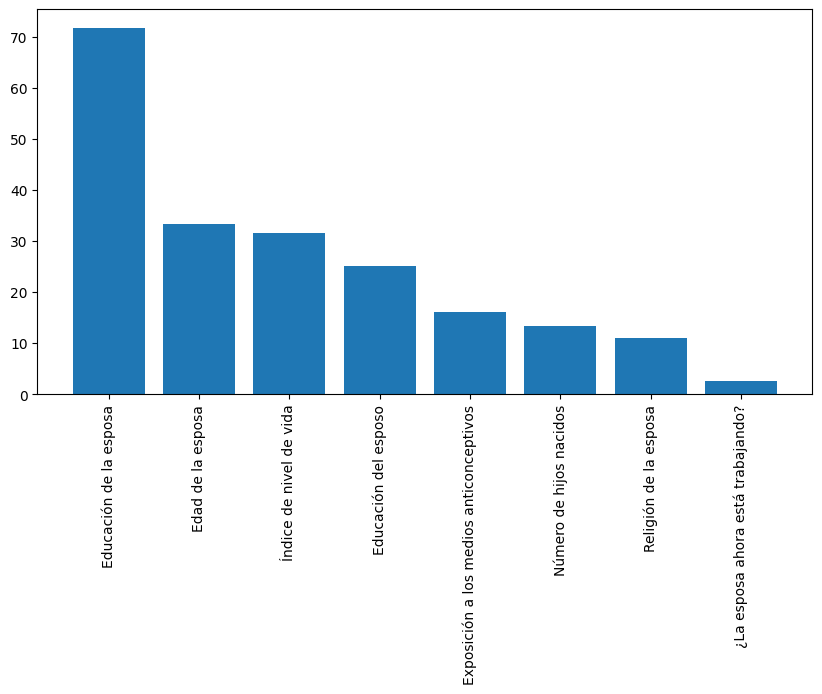

In [489]:
# Graficar importancia de características
plt.figure(figsize=(10, 5))
plt.bar(scores['Feature'], scores['Score'])
plt.xticks(rotation=90)
plt.show()

In [490]:
#Eliminamos las columnas menos importantes
df_selected = df_cleaned.drop(columns=['¿La esposa ahora está trabajando?', 'Religión de la esposa'])

<h2>3) División en entrenamiento y prueba</h2>
Se usó un 80%-20% de división. Esto permite un buen balance entre aprendizaje y validación.
<h2>4) Variables usadas para clasificación</h2>
Se analizaron:

Correlación de Pearson: Se observó qué variables tenían mayor relación con el método anticonceptivo.
SelectKBest: Se seleccionaron las variables más relevantes

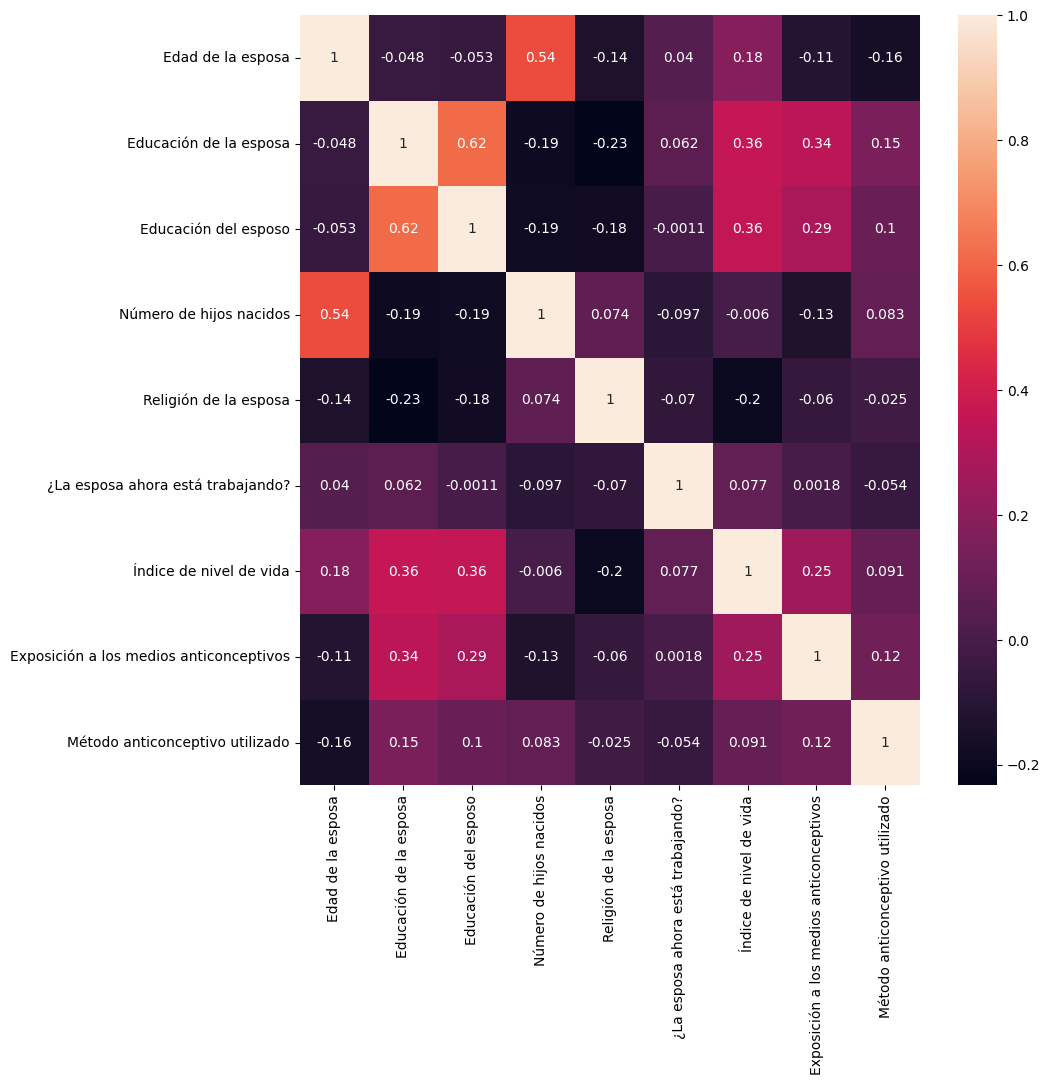

In [491]:
#Matrix de correlacion
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

Podemos observar que el numero de hijos está un poco correlacionado con la edad de la esposa, esto tiene sentido ya que entre más edad es más común tener más hijos. Además que la eduación de la esposa y la edad del esposo tienden a estar un poco más correlacionado, dandonos a entender que las personas tienden a tener el mismo nivel de educación.

<h2>5) Profundidad del árbol y selección óptima</h2>

In [492]:
#Para usar este método X y 'y' deben ser listas np
X=np.array(X)
y=np.array(y)

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=1) 
accuracies = list()
max_attributes = len(list(df_selected))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced') 
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.290584
         2          0.454209
         3          0.509864
         4          0.551291
         5          0.549275
         6          0.522764
         7          0.516636


Obtenemos una exactitud algo baja, pero al menos nos sirve para decidir que 4 de profundidad es lo optimo sin incurrir en overfiting.


<h2>6) Criterios para min_samples_split y min_samples_leaf</h2>
Mínimas muestras por nodo: Probamos con valores como 2, 5, 10, 20 y 30. <br>
Mínimas muestras en hojas: Se probaron valores de 1, 3, 5, 7 y 10. <br>
Se analizó anteriormente y es necesario el balanceo de cargas, así que usamos class_weight='balanced'. <br>

In [493]:
#Separamos los datos
X = df_selected.drop(columns=['Método anticonceptivo utilizado'])
y = df_selected['Método anticonceptivo utilizado']
# Dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hiperparámetros optimizados
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 10, 1),
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 3, 5, 7, 10],
}

# Modelo
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}


Para minimas muestras por nodo obtuvimos que 3 era lo más optimo y para minimas muestras por hoja obtuvimos 20.


<h2>7) Matriz de confusión</h2>
Se generaron matrices para entrenamiento y prueba.

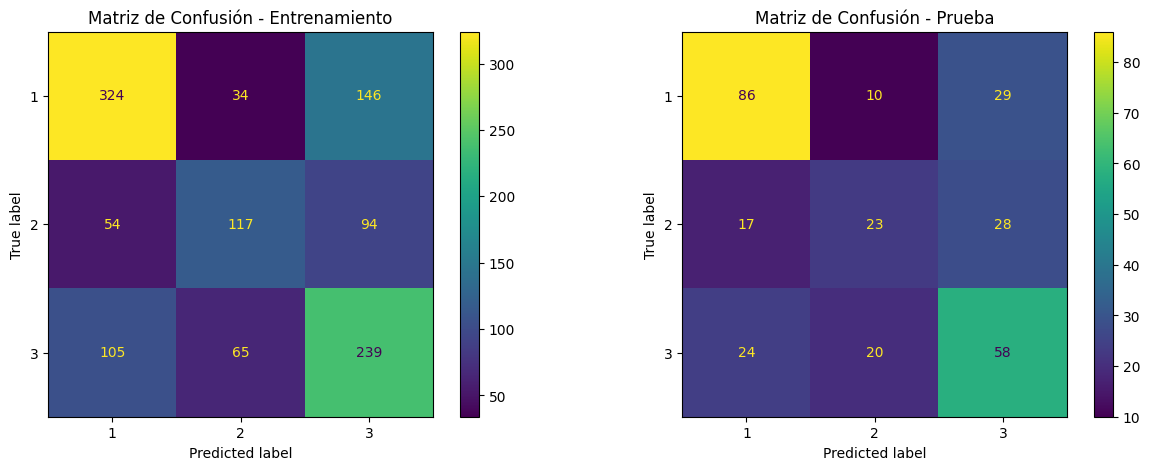

In [494]:
# Matriz de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train, ax=ax1)
ax1.set_title('Matriz de Confusión - Entrenamiento')
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax2)
ax2.set_title('Matriz de Confusión - Prueba')
plt.show()

<h2>8) Exactitud (accuracy) y 9) Métricas de evaluación</h2>

In [495]:
# Predicciones
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Métricas de rendimiento
print("Exactitud en entrenamiento: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Exactitud en prueba: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Exactitud en entrenamiento: 0.58
Exactitud en prueba: 0.57

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           1       0.68      0.69      0.68       125
           2       0.43      0.34      0.38        68
           3       0.50      0.57      0.53       102

    accuracy                           0.57       295
   macro avg       0.54      0.53      0.53       295
weighted avg       0.56      0.57      0.56       295



Se guardo el arbol de decisión.


In [496]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_model, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['Clase 1', 'Clase 2', 'Clase 3'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Guarda el árbol como archivo .pdf


'decision_tree.pdf'

<h2>10) Comparación con Naive Bayes</h2>

In [497]:
# Entrenar clasificador Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Predicciones
y_pred_nb = nb_model.predict(X_test)
# Calcular exactitud del modelo Naive Bayes
accuracy_nb_train = accuracy_score(y_train, nb_model.predict(X_train))
accuracy_nb_test = accuracy_score(y_test, y_pred_nb)
print("Exactitud en entrenamiento: {:.2f}".format(accuracy_nb_train))
print("Exactitud en prueba: {:.2f}".format(accuracy_nb_test))
# Métricas de rendimiento del arbol de decisión
print("Exactitud en entrenamiento: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Exactitud en prueba: {:.2f}".format(accuracy_score(y_test, y_pred_test)))
# Reporte de clasificación
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test))
# Reporte de clasificación del modelo Naive Bayes
print("\nReporte de clasificación en conjunto de prueba (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Exactitud en entrenamiento: 0.47
Exactitud en prueba: 0.43
Exactitud en entrenamiento: 0.58
Exactitud en prueba: 0.57

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           1       0.68      0.69      0.68       125
           2       0.43      0.34      0.38        68
           3       0.50      0.57      0.53       102

    accuracy                           0.57       295
   macro avg       0.54      0.53      0.53       295
weighted avg       0.56      0.57      0.56       295


Reporte de clasificación en conjunto de prueba (Naive Bayes):
              precision    recall  f1-score   support

           1       0.64      0.34      0.45       125
           2       0.34      0.54      0.42        68
           3       0.40      0.47      0.43       102

    accuracy                           0.43       295
   macro avg       0.46      0.45      0.43       295
weighted avg       0.49      0.43      0.44       295



<h2>11) Análisis de resultados y conclusiones.</h2>
-Se llegó a una conclusión principal de que el modelo predice mucho mejor a las parejas que no usan ningun metodo anticonceptivo, y es peor para predecir las opciones de corto y largo plazo. <br>
-La técnica de balanceo (class_weight='balanced') ayudó a mejorar el rendimiento en clases desbalanceadas, pero aún se observan errores en la clasificación de ciertos métodos anticonceptivos. <br>
-El modelo de arboles de decisión alcanza mayor exactitud y mejor rendimiento general debido a la eliminación de variables poco relevantes y el ajuste de hiperparámetros ayudaron a mejorar la generalización del modelo. <br>
-Algunas características como la edad de la esposa y la educación de la esposa demostraron ser altamente predictivas, lo que refuerza su importancia en el análisis.<br>
-Para futuras mejoras, se podrían probar otros modelos como Random Forest o SVM, así como explorar técnicas de ingeniería de características para mejorar la representación de los datos. <br>